In [1]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing all the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore") 

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,SNo.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.1,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1746,1746,"1,747",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1747,1747,"1,748",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1748,1748,"1,749",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN
1749,1749,"1,750",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [5]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"54,872"
1,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,720,281"
2,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,888,273"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,414,702"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,916,881"
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,817"
1747,1747,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,593"
1748,1748,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1749,1749,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,491"


In [7]:
df=pd.DataFrame()

In [8]:
df = pd.merge(df1, df2)
df

,Unnamed: 0,SNo.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.1,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"54,872"
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,720,281"
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,888,273"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,414,702"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,916,881"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,"1,747",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,817"
1747,1747,"1,748",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,593"
1748,1748,"1,749",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1749,1749,"1,750",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,491"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1751 non-null   int64  
 1   SNo.             1751 non-null   object 
 2   MovieName        1751 non-null   object 
 3   Duration         1751 non-null   int64  
 4   Year             1751 non-null   int64  
 5   Rating           1751 non-null   float64
 6   Metascore        1751 non-null   object 
 7   Director1        1751 non-null   object 
 8   Director2        113 non-null    object 
 9   Director3        13 non-null     object 
 10  Star1            1751 non-null   object 
 11  Star2            1751 non-null   object 
 12  Star3            1751 non-null   object 
 13  Star4            1751 non-null   object 
 14  Genre1           1751 non-null   object 
 15  Genre2           1751 non-null   object 
 16  Genre3           1751 non-null   object 
 17  GrossCollectio

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1751 non-null   object 
 1   MovieName        1751 non-null   object 
 2   Duration         1751 non-null   int64  
 3   Year             1751 non-null   int64  
 4   Rating           1751 non-null   float64
 5   Metascore        1751 non-null   object 
 6   Director1        1751 non-null   object 
 7   Director2        113 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1751 non-null   object 
 10  Star2            1751 non-null   object 
 11  Star3            1751 non-null   object 
 12  Star4            1751 non-null   object 
 13  Genre1           1751 non-null   object 
 14  Genre2           1751 non-null   object 
 15  Genre3           1751 non-null   object 
 16  GrossCollection  1751 non-null   object 
 17  Certification 

In [14]:
# Value counts for each data feature
for x in df.columns:
    print(df[x].value_counts())
    print("no of unique values",df[x].nunique())
    print('----------------------------------')

1        1
1,165    1
1,176    1
1,175    1
1,174    1
        ..
581      1
580      1
579      1
578      1
1,751    1
Name: SNo., Length: 1751, dtype: int64
no of unique values 1751
----------------------------------
Mr                               3
G                                3
War                              2
RoboCop                          2
Hellboy                          2
                                ..
The Hitman's Bodyguard           1
National Treasure                1
Robin Hood: Prince of Thieves    1
Romancing the Stone              1
Sadak 2                          1
Name: MovieName, Length: 1709, dtype: int64
no of unique values 1709
----------------------------------
107    48
109    42
100    42
110    41
102    40
       ..
321     1
166     1
45      1
67      1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
----------------------------------
2016    78
2014    76
2018    70
2011    69
2013    67
        ..
1932     1
194

In [15]:
df.replace("Nan", np.nan, inplace=True)

In [16]:
df.isnull().sum()

SNo.                  0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore           184
Director1             0
Director2          1638
Director3          1738
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                2
Genre3              144
GrossCollection     280
Certification        10
votes                 0
dtype: int64

In [17]:
# Dropping off maxiumum entries of null values present in columns Director2 and Director3.
df.drop(["Director2","Director3"], axis=1, inplace=True)

In [18]:
# Using mode to fill null values for object columns - Metascore, Certification and genre 3
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre3'] =df['Genre3'].fillna(df['Genre3'].mode()[0])

In [19]:
# First we converted column Gross collection to float dataype and then used mean to fill null values.
df['GrossCollection'] = df['GrossCollection'].astype(float)
df['GrossCollection'] = df['GrossCollection'].fillna(df['GrossCollection'].mean())

In [20]:
df.isnull().sum().sum()

6

In [21]:
df.isnull().sum().sum()

6

In [22]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1751 non-null   object 
 1   MovieName        1751 non-null   object 
 2   Duration         1751 non-null   int64  
 3   Year             1751 non-null   int64  
 4   Rating           1751 non-null   float64
 5   Metascore        1751 non-null   object 
 6   Director1        1751 non-null   object 
 7   Star1            1751 non-null   object 
 8   Star2            1750 non-null   object 
 9   Star3            1750 non-null   object 
 10  Star4            1749 non-null   object 
 11  Genre1           1751 non-null   object 
 12  Genre2           1749 non-null   object 
 13  Genre3           1751 non-null   object 
 14  GrossCollection  1751 non-null   float64
 15  Certification    1751 non-null   object 
 16  votes            1751 non-null   object 
dtypes: float64(2),

In [24]:
# Converting all the columns which should be integer datatype but are object datatype.
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['SNo.'] = df['SNo.'].str.replace(',', '').astype(int)

# Exploratory Data Analysis

In [25]:
df.columns

Index(['SNo.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

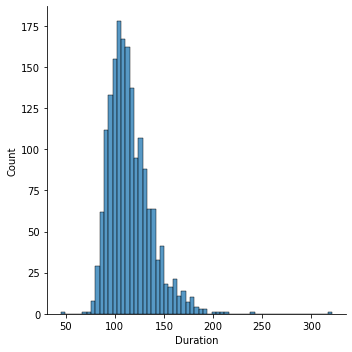

In [26]:
sns.displot(x="Duration", data=df)

Most movies are 90 to 120 minutes long.
Few movies are in range of less than 60 minutes or more than 200 minutes.

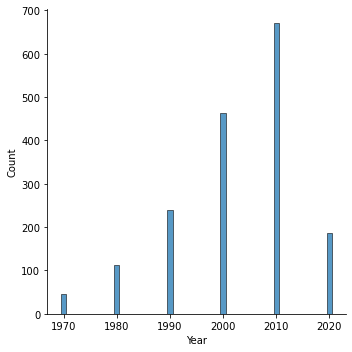

In [27]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

In the decade of 2000-2010 highest number of movies were released.

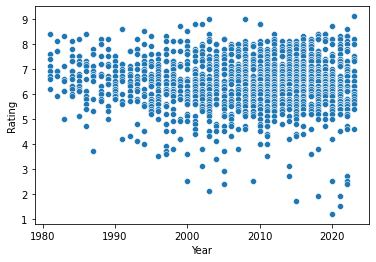

In [28]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()

Highest rated movies have been released in years between 2000-2010.

Some of new movies launched between year 2015-2020 has been the lowest rated movies.

Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

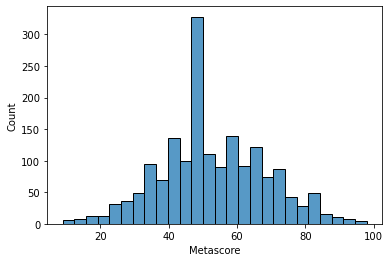

In [29]:
sns.histplot(x=df["Metascore"])
plt.show()

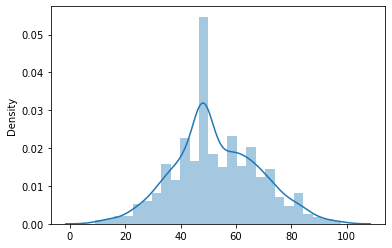

In [30]:
sns.distplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 45-50

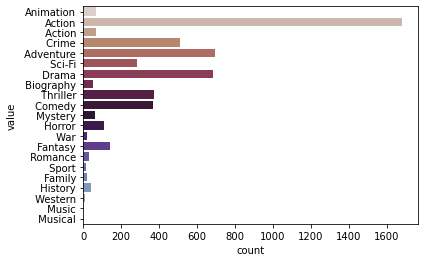

In [36]:
sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value", palette='twilight_r')
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.
Least made movies are in sport, family, western, war and history

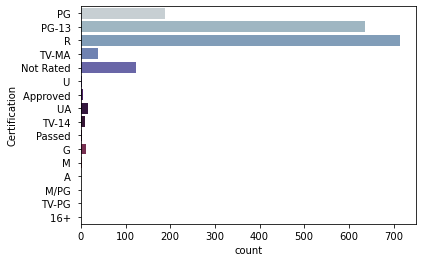

In [37]:
sns.countplot(y=df["Certification"], palette='twilight')
plt.show()

Most movies are PG-13 and R rated.
Very few movies are G, approved, UA, TV-14 rated.

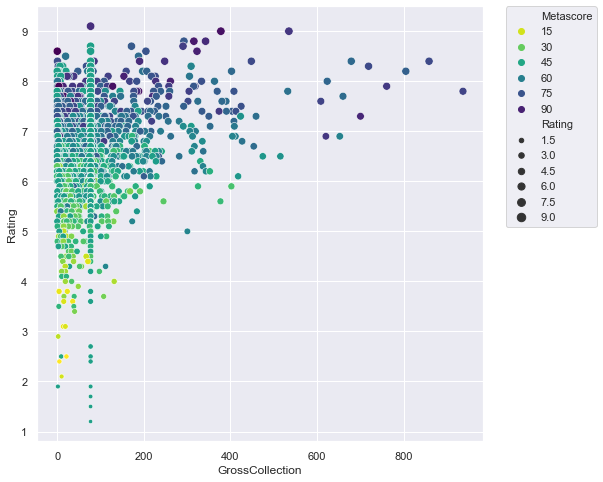

In [44]:
sns.set(font_scale=1)
fig, (ax) = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x="GrossCollection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df, palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

-Higher rated movies have been found to have higher gross collection.

-Even with high rating and metascore, movies have been found to be grossing below average.

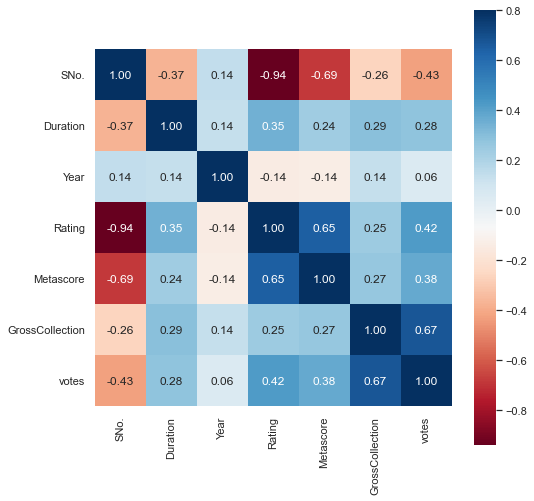

In [50]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f", cmap="RdBu")
plt.show()

Correlation between Metascore and rating, and Gross Collection and votes is visible in the heatmap

# Preparing data for Machine Learning Model

Dropping off columns which are not required for machine learning

In [51]:
df.columns

Index(['SNo.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

In [53]:
df1=df.drop(["SNo.","MovieName",], axis=1)

Encoding the categorical data

In [54]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director1']=le.fit_transform(df1['Director1'])
df1['Star1']=le.fit_transform(df1['Star1'])
df1['Star2']=le.fit_transform(df1['Star2'])
df1['Star3']=le.fit_transform(df1['Star3'])
df1['Star4']=le.fit_transform(df1['Star4'])
df1['Genre1']=le.fit_transform(df1['Genre1'])
df1['Genre2']=le.fit_transform(df1['Genre2'])
df1['Genre3']=le.fit_transform(df1['Genre3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         1751 non-null   int64  
 1   Year             1751 non-null   int64  
 2   Rating           1751 non-null   float64
 3   Metascore        1751 non-null   int32  
 4   Director1        1751 non-null   int32  
 5   Star1            1751 non-null   int32  
 6   Star2            1751 non-null   int32  
 7   Star3            1751 non-null   int32  
 8   Star4            1751 non-null   int32  
 9   Genre1           1751 non-null   int32  
 10  Genre2           1751 non-null   int32  
 11  Genre3           1751 non-null   int32  
 12  GrossCollection  1751 non-null   float64
 13  Certification    1751 non-null   int32  
 14  votes            1751 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 208.2 KB


All columns have been converted into integer or float datatype.

# Removing Outlier using Z-score

In [56]:
z=np.abs(zscore(df1))
dfnew=df1[(z<3).all(axis=1)]
dfnew

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
8,153,2020,8.7,48,863,636,867,1254,76,0,5,4,77.158022,12,119545
20,101,2003,8.4,77,657,109,1148,642,739,0,5,11,0.710000,10,596814
22,137,1986,8.4,84,365,614,762,176,1047,0,1,13,85.160000,10,732903
23,145,2019,8.4,48,536,359,817,95,427,0,1,3,77.158022,6,36160
24,141,2019,8.4,48,917,163,711,981,1033,0,5,4,77.158022,6,31217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,107,2000,3.6,14,163,352,503,1323,151,0,1,6,15.220000,8,35187
1729,95,1997,3.6,11,447,560,1051,503,1211,0,1,6,35.930000,8,56434
1730,99,2017,3.6,48,26,564,340,963,1052,0,5,4,77.158022,10,33482
1731,98,1996,3.5,40,192,506,46,14,279,0,11,4,3.790000,10,30313


In [57]:
df1

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,140,2023,9.1,86,410,609,399,154,828,1,0,0,77.158022,7,54872
1,152,2008,9.0,84,151,119,410,2,903,0,4,4,534.860000,8,2720281
2,201,2003,9.0,94,684,184,1102,465,1021,0,1,4,377.850000,8,1888273
3,148,2010,8.8,74,151,409,564,353,724,0,1,13,292.580000,8,2414702
4,178,2001,8.8,92,684,184,428,941,1228,0,1,4,315.540000,8,1916881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,109,2021,1.9,48,703,578,277,1007,517,0,4,15,77.158022,12,178817
1747,160,2018,1.9,48,724,43,973,142,519,0,4,15,1.690000,6,47593
1748,85,2015,1.7,48,810,192,466,1082,1413,0,7,13,77.158022,10,42911
1749,125,2021,1.5,48,497,694,59,110,410,0,4,4,77.158022,10,39491


In [58]:
(1751-1477)*100/1751

15.64820102798401

15.64 % has been removed in outlier treatment, which is under considerable range.

# Skewness

In [59]:
dfnew.skew()

Duration           0.814955
Year              -0.909170
Rating            -0.303211
Metascore          0.165278
Director1         -0.106967
Star1              0.029294
Star2             -0.024798
Star3              0.038522
Star4              0.037233
Genre1             0.000000
Genre2             1.325171
Genre3             0.313838
GrossCollection    1.825178
Certification     -0.189439
votes              1.951404
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [61]:
from sklearn.preprocessing import power_transform

for x in dfnew.drop(["GrossCollection","votes"],axis=1).columns:
    if abs(dfnew[f'{x}'].skew())>0.5:
        dfnew[[f'{x}']]=power_transform(dfnew[[f'{x}']],method='yeo-johnson')
        print("transformed skewness for :",x)
    else:
        continue

transformed skewness for : Duration
transformed skewness for : Year
transformed skewness for : Genre2


In [62]:
dfnew.skew()

Duration           0.022564
Year              -0.351510
Rating            -0.303211
Metascore          0.165278
Director1         -0.106967
Star1              0.029294
Star2             -0.024798
Star3              0.038522
Star4              0.037233
Genre1             0.000000
Genre2             0.060767
Genre3             0.313838
GrossCollection    1.825178
Certification     -0.189439
votes              0.000000
dtype: float64

Skewness has been removed from all the required columns

# preparing model for Gross Collection

using Regressor model for the prediction of Gross Calculation

In [63]:
# Scaling of Independent features
X=dfnew.drop(["GrossCollection"],axis=1)
y=dfnew["GrossCollection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

Predicting the best random state

In [64]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.14455142281218314
At random state 0, The test accuracy is :-0.1793466764540197


At random state 1, The training accuracy is :-0.16109316850374744
At random state 1, The test accuracy is :-0.14359329653758846


At random state 2, The training accuracy is :-0.16459266667279626
At random state 2, The test accuracy is :-0.1312107179305947


At random state 3, The training accuracy is :-0.16734537572203023
At random state 3, The test accuracy is :-0.13435852602348852


At random state 4, The training accuracy is :-0.1831396614474743
At random state 4, The test accuracy is :-0.1022276989442853


At random state 5, The training accuracy is :-0.17175788391778657
At random state 5, The test accuracy is :-0.13202125627448702


At random state 6, The training accuracy is :-0.15933662381472102
At random state 6, The test accuracy is :-0.15532299090685708


At random state 7, The training accuracy is :-0.17005131549043706
At random state 7, The test 

In [65]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(989, 14) (989,)
(488, 14) (488,)


In [66]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 40.581542471991135
Mean Squared Error: 3055.8998280565734
Root Mean Squared Error: 55.28019381348598
R squared score:  0.18218816912358005
Cross Validation Score is : [0.14947626 0.11045126 0.06689373 0.11637642 0.12597986]
Mean Score : 0.11383550542744243
Difference : -0.06835266369613761


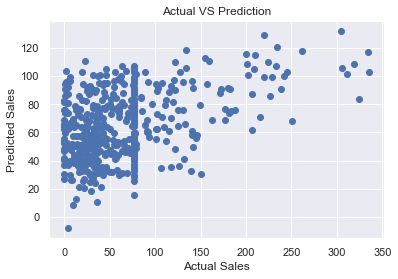

*******************************************


*******************************************
Scores for Lasso() are
Mean Absolute Error: 40.3899279628559
Mean Squared Error: 3058.1418859460496
Root Mean Squared Error: 55.30046912952954
R squared score:  0.18158815552015983
Cross Validation Score is : [0.14653935 0.11244502 0.07606066 0.12251495 0.13774686]
Mean Score : 0.11906136749679667
Difference : -0.06252678802336316


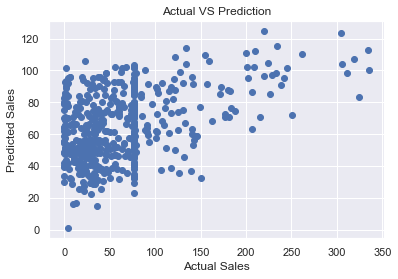

*******************************************


*******************************************
Scores for SVR() are
Mean Absolute Error: 39.90842471882251
Mean Squared Error: 3426.437885770685
Root Mean Squared Error: 58.53578295171839
R squared score:  0.08302575397946665
Cross Validation Score is : [ 0.00514043  0.06890537 -0.00656238  0.04539482  0.02848788]
Mean Score : 0.0282732237725678
Difference : -0.05475253020689885


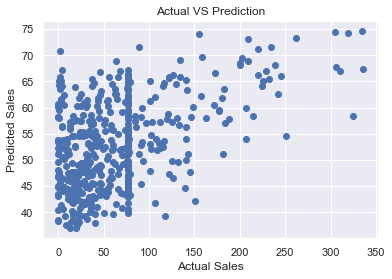

*******************************************


*******************************************
Scores for DecisionTreeRegressor() are
Mean Absolute Error: 49.91417894874682
Mean Squared Error: 4851.671362879255
Root Mean Squared Error: 69.65394003844474
R squared score:  -0.2983914602365443
Cross Validation Score is : [-0.33791089 -0.72067948 -0.50862566 -0.5779757  -0.2531228 ]
Mean Score : -0.4796629043001145
Difference : -0.1812714440635702


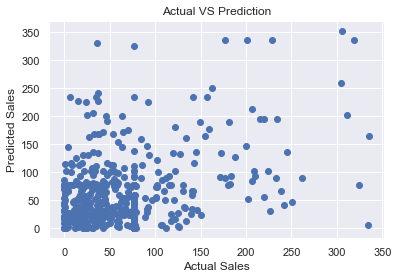

*******************************************


*******************************************
Scores for RandomForestRegressor() are
Mean Absolute Error: 37.13620764813722
Mean Squared Error: 2438.898380605568
Root Mean Squared Error: 49.385204065646704
R squared score:  0.34730846487431055
Cross Validation Score is : [0.32581473 0.25990953 0.20106192 0.19207931 0.30777194]
Mean Score : 0.25732748538714845
Difference : -0.0899809794871621


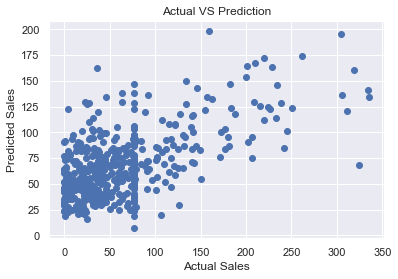

*******************************************


*******************************************
Scores for GradientBoostingRegressor() are
Mean Absolute Error: 38.54779603091593
Mean Squared Error: 2610.4388741834105
Root Mean Squared Error: 51.09245418046984
R squared score:  0.30140125160954934
Cross Validation Score is : [0.35210345 0.2433703  0.22434912 0.15084305 0.24868155]
Mean Score : 0.24386949236233754
Difference : -0.057531759247211794


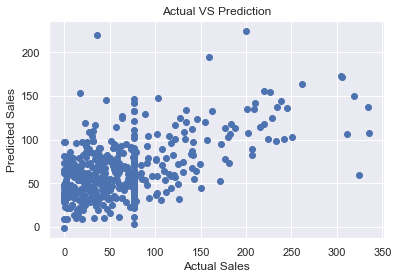

*******************************************


*******************************************


In [67]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("*******************************************\n\n\n*******************************************")

It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating Overfitting/Underfitting

In [68]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [69]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [70]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.281105014056097
The mean absolute error 40.67697200686437
root_mean_squared_error: 55.84598025878691


In [72]:
import joblib
joblib.dump(GB,"grosscollection.obj")

['grosscollection.obj']

In [73]:
GB_load=joblib.load('grosscollection.obj')

# Preparing model for Number of votes.

Scaling of Independent Features

In [74]:
X=dfnew.drop(["votes"],axis=1)
y=dfnew["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

Predicting the best random state

In [75]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :1.0
At random state 0, The test accuracy is :1.0


At random state 1, The training accuracy is :1.0
At random state 1, The test accuracy is :1.0


At random state 2, The training accuracy is :1.0
At random state 2, The test accuracy is :1.0


At random state 3, The training accuracy is :1.0
At random state 3, The test accuracy is :1.0


At random state 4, The training accuracy is :1.0
At random state 4, The test accuracy is :1.0


At random state 5, The training accuracy is :1.0
At random state 5, The test accuracy is :1.0


At random state 6, The training accuracy is :1.0
At random state 6, The test accuracy is :1.0


At random state 7, The training accuracy is :1.0
At random state 7, The test accuracy is :1.0


At random state 8, The training accuracy is :1.0
At random state 8, The test accuracy is :1.0


At random state 9, The training accuracy is :1.0
At random state 9, The test accuracy is :1.0


At random state 10, The training accurac

In [76]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(989, 14) (989,)
(488, 14) (488,)


Scores for LinearRegression() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


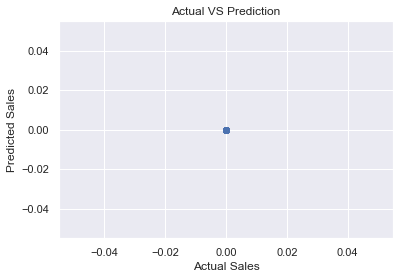

*******************************************


*******************************************
Scores for Lasso() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


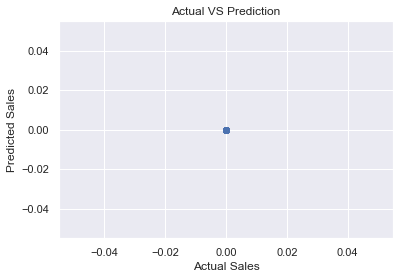

*******************************************


*******************************************
Scores for SVR() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


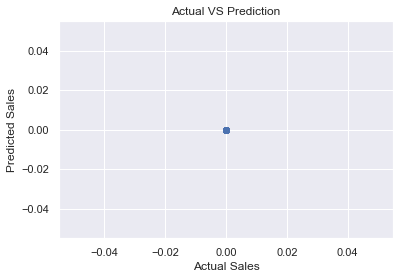

*******************************************


*******************************************
Scores for DecisionTreeRegressor() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


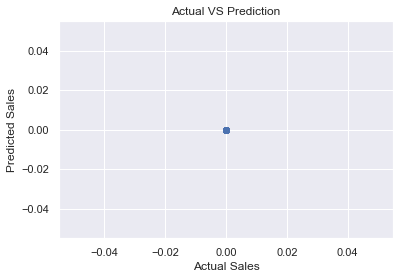

*******************************************


*******************************************
Scores for RandomForestRegressor() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


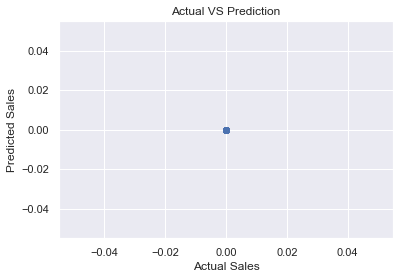

*******************************************


*******************************************
Scores for GradientBoostingRegressor() are
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R squared score:  1.0
Cross Validation Score is : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Difference : 0.0


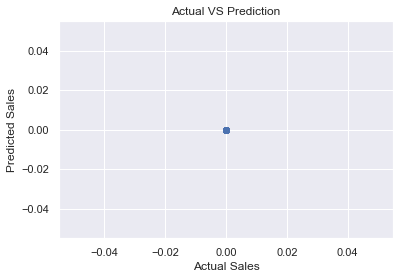

*******************************************


*******************************************


In [77]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("*******************************************\n\n\n*******************************************")

It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating Overfitting/Underfitting

In [78]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [79]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [80]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 1.0
The mean absolute error 0.0
root_mean_squared_error: 0.0


In [81]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [82]:
GB1_load=joblib.load('votes.obj')